# Logistic Regression 
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [2]:
filename    = 'Assignment 07 data.csv'
data        = np.genfromtxt(filename, delimiter=',')
num_data    = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):
    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]

## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [3]:
def linear_regression(theta, point):
    value = np.dot(theta, point)
    return value

## define sigmoid function with input $x$

In [4]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function for the logistic regression

In [5]:
def compute_loss(theta, point, label):
    loss = 0
    
    n = label.size
    for i in range(n):
        f = linear_regression(theta, point[:, i])
        sigvalue = sigmoid(f)
        loss += ( -label[i] * np.log(sigvalue) - (1 - label[i]) * np.log(1 - sigvalue) ) / n
    
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [6]:
def compute_gradient(theta, point, label):
    gradient = 0
    
    n = label.size
    for i in range(n):
        f = linear_regression(theta, point[:, i])
        sigvalue = sigmoid(f)
        gradient += ((sigvalue - label[i]) * point[:, i]) / n 

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [7]:
num_iteration   = 5000  
learning_rate   = 0.001 
theta           = np.array((0, 0, 0))  

theta_iteration = np.zeros((num_iteration, 3))
loss_iteration = np.zeros(num_iteration)

point = np.zeros((3, label.size))
point[0, :] = 1
point[1, :] = point_x[:]
point[2, :] = point_y[:]

## iterations for the gradient descent

In [8]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient(theta, point, label)
    loss   = compute_loss(theta, point, label)
   
    theta_iteration[i] = theta.reshape(1, 3)
    loss_iteration[i]  = loss
    
    # print("iteration = %4d, loss = %5.5f" % (i, loss))

## plot the results

In [9]:
grid_x = np.arange(min(point_x), max(point_x), 0.1)
grid_y = np.arange(min(point_y), max(point_y), 0.1)
XX, YY = np.meshgrid(grid_x, grid_y)

best_theta = theta_iteration[num_iteration-1, :] 
ZZ = best_theta[0] + best_theta[1] * XX + best_theta[2] * YY

In [10]:
def plot_data(point_x, point_y, label):
    plt.figure(figsize=(8,8))
    plt.title('training data')

    for i in range(label.size):
        if label[i] == 0:
            plt.plot(point_x[i], point_y[i], '.', color='blue')
        elif label[i] == 1:
            plt.plot(point_x[i], point_y[i], '.', color='red')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    
    
def plot_model_parameter(theta_iteration):
    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color = 'red')
    plt.plot(theta_iteration[:, 1], '-', color = 'green')
    plt.plot(theta_iteration[:, 2], '-', color = 'blue')

    plt.xlabel('iteration')
    plt.tight_layout()
    plt.show()
    
    
    
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.plot(loss_iteration, '-', color = 'red')

    plt.tight_layout()
    plt.show()
    
    
    
def plot_classifier(point_x, point_y, label, best_theta, XX, YY, ZZ):
    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    # 데이터 포인트
    for i in range(label.size):
        if label[i] == 0:
            plt.plot(point_x[i], point_y[i], '.', color='blue')
        elif label[i] == 1:
            plt.plot(point_x[i], point_y[i], '.', color='red')
            
    # 배경 
    plt.scatter(XX, YY, c=ZZ, cmap='coolwarm')
    plt.colorbar()

    # 검은 선 
    black_line = -(best_theta[0] + best_theta[1] * point_x) / best_theta[2]
    plt.plot(point_x, black_line, '-', color='black')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Results
<hr>

## 01. plot the input data point in blue for class 0 and in red for class 1

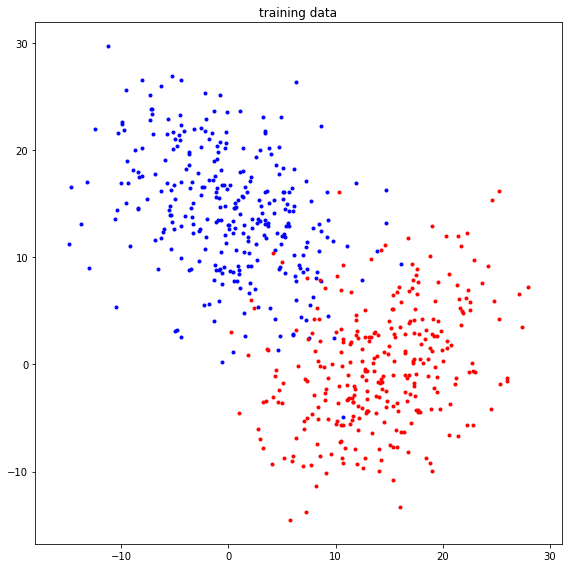

In [11]:
plot_data(point_x, point_y, label)

## 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

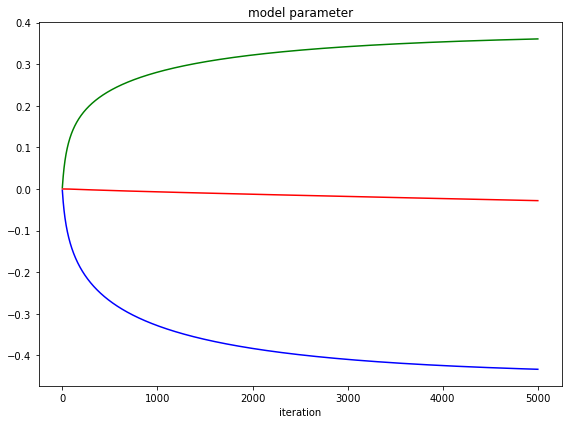

In [12]:
plot_model_parameter(theta_iteration)

## 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

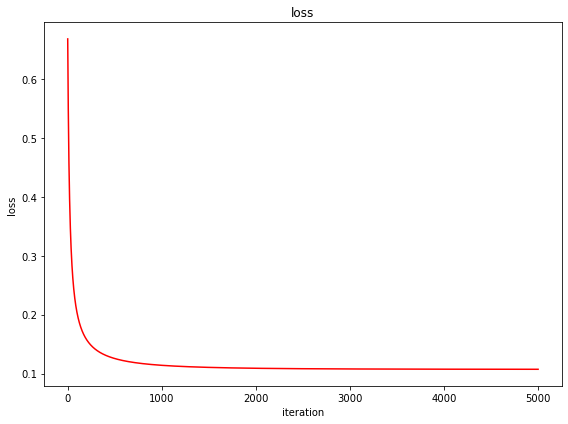

In [13]:
plot_loss_curve(loss_iteration)

## 04. plot the classifier with the given data points superimposed

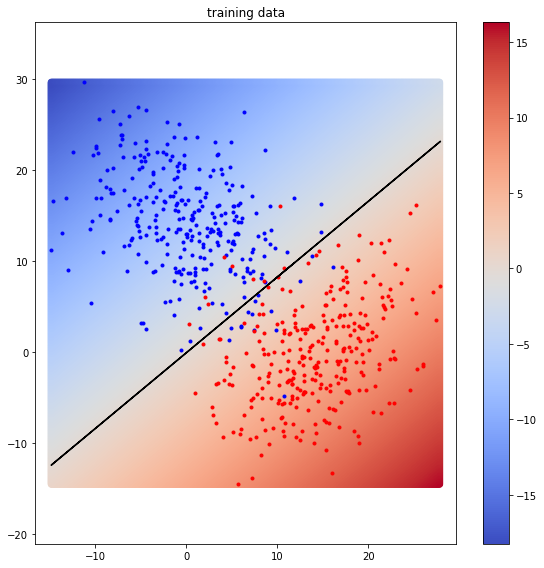

In [14]:
plot_classifier(point_x, point_y, label, best_theta, XX, YY, ZZ)